<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Orbital_tumor_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Orbital tumor**

In [1]:
# prompt: gdriveをマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=31a4ca11c16850b06337f634ec5750dbf6a30d03c1b8efc976d1c56fc1f74949
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
import pandas as pd

# Load the CSV file with shift-jis encoding
file_path = "/content/drive/MyDrive/発表/2024近畿神経眼科セミナー/merged_patient_data.csv"
data = pd.read_csv(file_path, encoding='shift-jis')

# Define the categories and their corresponding keywords without numbers in parentheses
categories = {
    '炎症性疾患': [
        'Inflammation', 'myositis', 'GPA', 'Sarcoidosis'
    ],
    'リンパ性疾患': [
        'IgG4-ROD', 'MALT lymphoma', 'Diffuse large B-cell lymphoma',
        'Follicular lymphoma', 'Indolent lymphoma', 'Reactive lymphoid hyperplasia',
        'NKT lymphoma', 'Malignant lymphoma'
    ],
    '嚢胞': [
        'Dermoid', 'Dacriops', 'Cyst', 'Epidermal cyst'
    ],
    '上皮性腫瘍': [
        'Pleomorphic adenoma', 'Adenoid cystic carcinoma', 'Squamous cell carcinoma',
        'Sebaceous gland carcinoma', 'Carcinoma ex pleomorphic adenoma', 'Sebaceous gland carcinomas'
    ],
    '非上皮性良性腫瘍': [
        'Cavenous hemangioma', 'Schwannoma', 'Lipoma', 'Neurofibroma'
    ],
    '非上皮性悪性腫瘍': [
        'Metastatic', 'Malignant melanoma', 'Sarcoma', 'Ewing', 'Clear cell sarcoma',
        'well-differentiated liposarcoma', 'Sebaceous gland carcinoma'
    ],
    '血管性病変': [
        'Lymphatic malfomation', 'Venous malformation', 'Infantile hemangioma',
        'Lymphatic malformation'
    ],
    '眼窩外からの進展': [
        'Osteoma', 'Paranasal sinus carcinoma', 'Paranasal sinus cyst',
        'Paranasal sinus SCC', 'Paranasal sinus adenoid cystic carcinoma',
        'Paranasal sinus melanoma', 'Fibrous dysplasia', 'Parasinus sinus carcinoma'
    ],
    'その他': [
        'Orbital abscess', 'Foreign body granuloma', 'Amyloidosis', 'Multiple myeloma',
        'Optic meningioma', 'Meningioma', 'Swollen MiraGel', 'Xanthogranuloma', 'CCF',
        'Jugular venous reflux syndrome', 'Venous thrombosis', 'Hystiocytosis', 'Hematoma',
        'Optic glioma', 'Fibrous lesion'
    ]
}

# Create a function to categorize each row based on the '概要' column
def categorize_row(row):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in row.lower():
                return category
    return '分類なし'

# Apply the function to the '概要' column
data['分類'] = data['概要'].apply(categorize_row)

# Check for rows that are not categorized
uncategorized = data[data['分類'] == '分類なし']

data

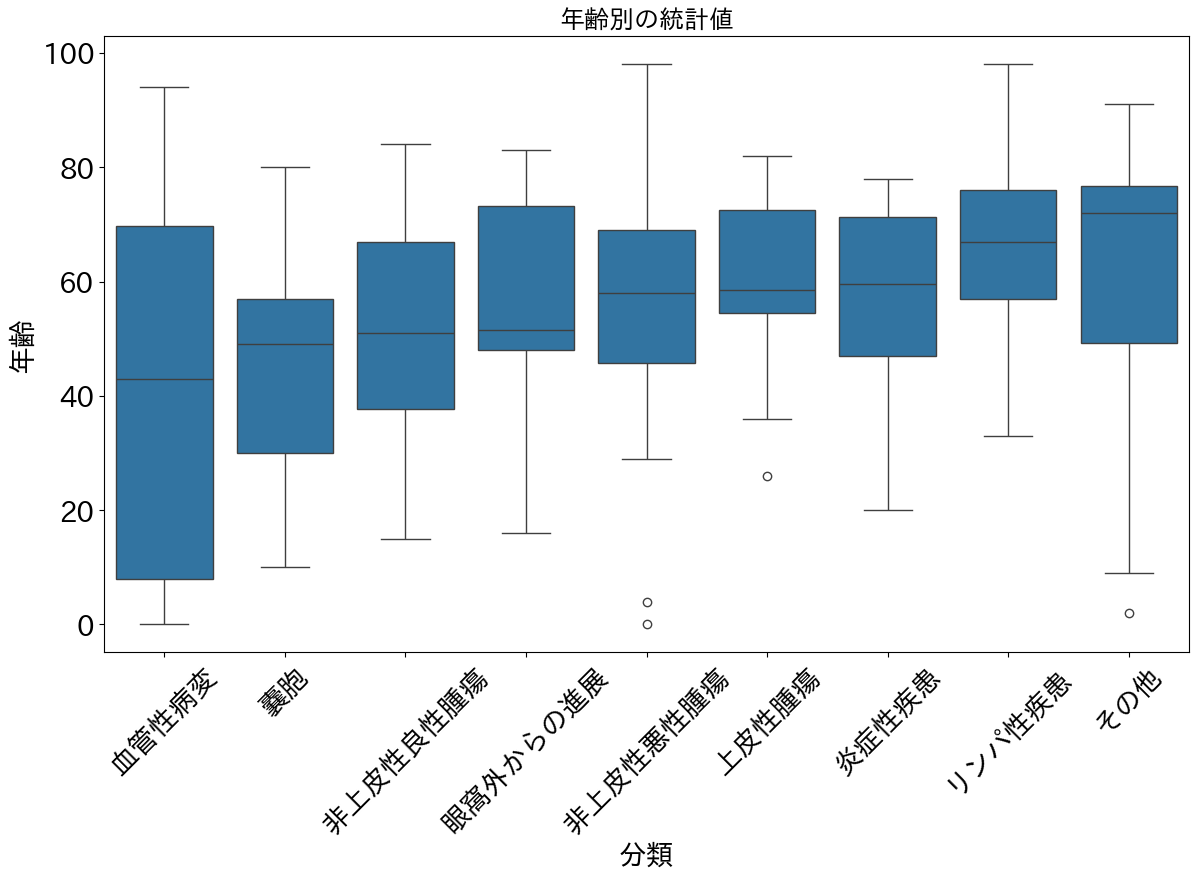

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Sort categories by the median age
median_ages = data.groupby('分類')['Age'].median().sort_values()
sorted_categories = median_ages.index.tolist()

# Set the font size
plt.rcParams.update({'font.size': 20})

# Create a box plot for Age based on the sorted categories using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='分類', y='Age', data=data, order=sorted_categories)
plt.title('年齢別の統計値', fontsize=18)
plt.xlabel('分類', fontsize= 20)
plt.ylabel('年齢', fontsize=20)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.show()